# Heart Failure Prediction
**Project by Group 21: Hannah Cooper, James Xu, Joselin Hartanto, Nancy Xu**

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/UCB-stat-159-s23/project-Group21.git/HEAD)

## Purpose

The purpose of this project is to analyze the prediction of Heart failure. Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import raw data
raw_data = pd.read_csv('data/heart.csv')
raw_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [27]:
from analysis import utils

## Preprocess data

We import util functions from util.py to clean the data. This  function one hot encodes the categorical columns, and uses sklearn's preprocessing function MinMaxScaler() to scale the data. It returns the X dataframe with all the features, and and labels y. 

In [4]:
X,y = utils.clean_data(raw_data)

/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


We inspect the columns/features

In [15]:
list(X.columns)

['Age',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'RestingBP',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

We then split the data into train and test sets.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Modeling

We fit logistic regression, mlp, and random forest models using x_train and y_train, then choose the best model based on the model test accuracies. We then plot the roc curve and saves the roc cure to the folder ./figures. 

In [9]:
logisticRegr, clf, RF = utils.fit_models(x_train, y_train, x_test, y_test)

/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
best_model, best_test_predictions, best_model_name = utils.choose_best_model(logisticRegr, clf, RF, x_test, y_test)



Best Model is: mlp


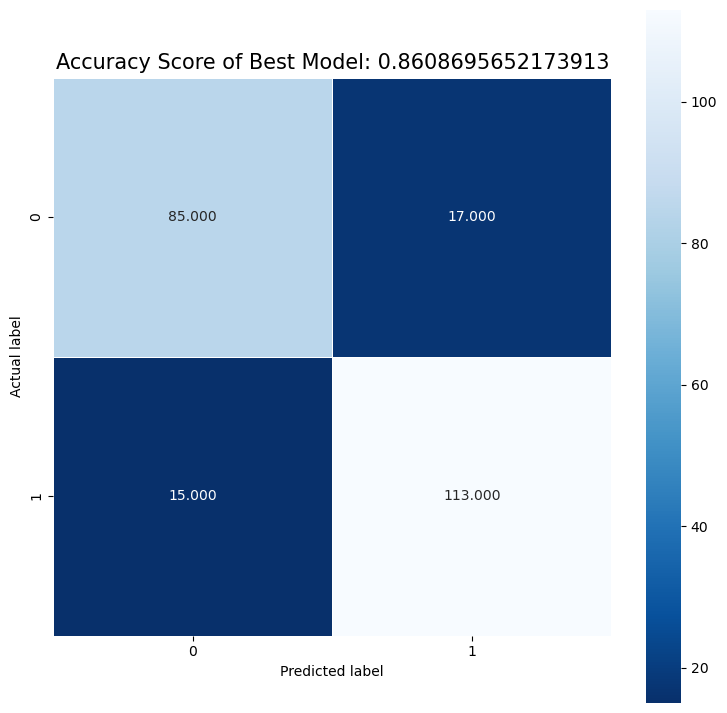

Best model AUC is: 0.8580729166666667


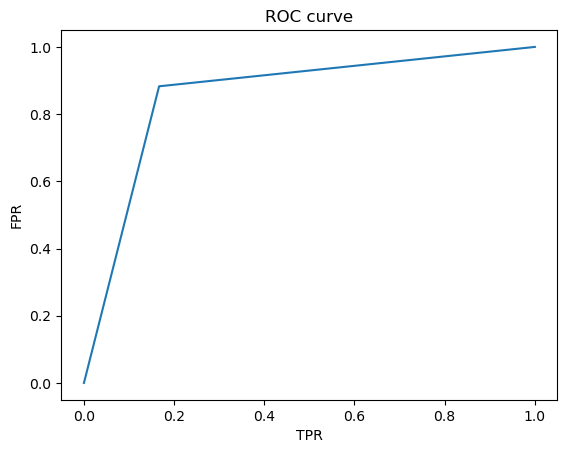

In [11]:
utils.graph_confusion_roc(best_model, x_test, y_test, best_test_predictions, best_model_name, root_dir = '.')